**Assignment-1**

Name : Mudit sand

Roll No. : 203100068

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Part a - d of the question 1 is in the another colab notebook attached in moodle with the name of wine.ipynb.... Please go throght that first all data processing are explained over ther and this is just a repetition of that By interchangeing the datasets.... Thanks**

Part e)

Here I changed the datasets and looking at the result i found that test accuracy is in negative so we cant use the same models .

Importing the file
Dataset Link :-  https://archive.ics.uci.edu/ml/datasets/Wine+Quality

1) Part-a : Download the wine quality datasets.

In [2]:
from google.colab import files
winedata = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


Using red wine as training data and white wine as test data, and after completing the analysis on this set I will reverse the order and see the effect.

1) Part-b : Explore, visualize and process the data.

In [3]:
train_df = pd.read_csv('winequality-white.csv')
test_df = pd.read_csv('winequality-red.csv')

## Displaying the train and test data
display(train_df)
display(test_df)


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
...,...
4893,6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...
4894,6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...
4895,6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....
4896,5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


Since the data is not separated and lie in one coloum with "; " used as sepration.

We will write a function to separate the data into different coloums and store it in a new dataframe.

In [4]:
def data_seperation(df):
  rows = list()
  for index , row in df.iterrows() :
    rows.append(pd.to_numeric(row.str.split(';')[0]))
  df_columns = (df.columns.str.split(';'))[0] #removing the ;
  column = list()
  for value in df_columns:
    column.append(value.strip('"')) #removing the " from the column names
  new_df = pd.DataFrame(rows, columns = column)
  return new_df

train_df_final = data_seperation(train_df) #new dataframe for training
display(train_df_final)
test_df_final = data_seperation(test_df) #new dataframe for testing
display(test_df_final)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [5]:
#getting the null count in training data
train_df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


Observation : 
Training set dont have any null values also all the data succesfully converted into the float while seperating the data so it means that data does not include any categorical variable.

Next:
We observer for test data sest

In [6]:
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


Observation : 
Test data set also dont have any null values also all the data succesfully converted into the float while seperating the data so it means that data does not include any categorical variable.

In [7]:
for col in train_df_final.columns.values :
  print(str(col) + ' has| ' +str(len(train_df_final[col].unique())) +' |unique values ')

fixed acidity has| 68 |unique values 
volatile acidity has| 125 |unique values 
citric acid has| 87 |unique values 
residual sugar has| 310 |unique values 
chlorides has| 160 |unique values 
free sulfur dioxide has| 132 |unique values 
total sulfur dioxide has| 251 |unique values 
density has| 890 |unique values 
pH has| 103 |unique values 
sulphates has| 79 |unique values 
alcohol has| 103 |unique values 
quality has| 7 |unique values 


Observation:
Since the quality coloumn have less than 10 unique values and this is also our target feature so this should be a good classification problem but here we have to use Regressioni methods for Machine learning as mentioned in the problem.
Next:
Repeat for test dataset

In [8]:
for col in test_df_final.columns.values :
  print(str(col) + ' has| ' +str(len(test_df_final[col].unique())) +' |unique values ')

fixed acidity has| 96 |unique values 
volatile acidity has| 143 |unique values 
citric acid has| 80 |unique values 
residual sugar has| 91 |unique values 
chlorides has| 153 |unique values 
free sulfur dioxide has| 60 |unique values 
total sulfur dioxide has| 144 |unique values 
density has| 436 |unique values 
pH has| 89 |unique values 
sulphates has| 96 |unique values 
alcohol has| 65 |unique values 
quality has| 6 |unique values 


test datasets also have the similar properties so these two datasets are good complementry to each other and we will interchange these and do the analysis in the last.

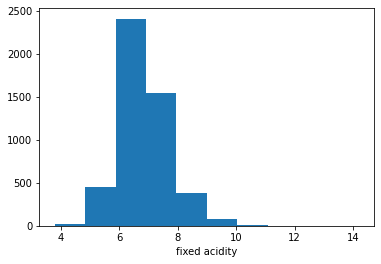

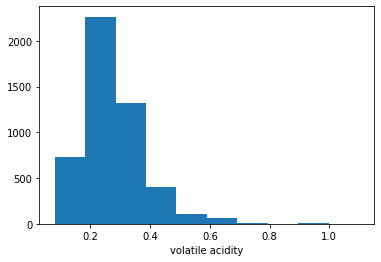

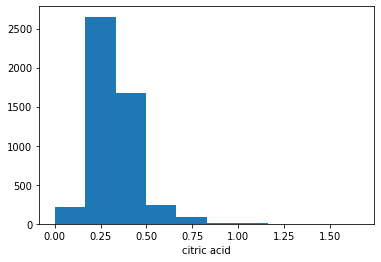

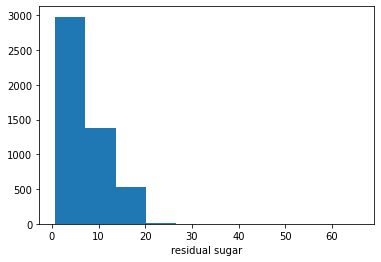

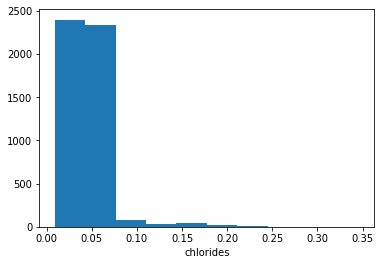

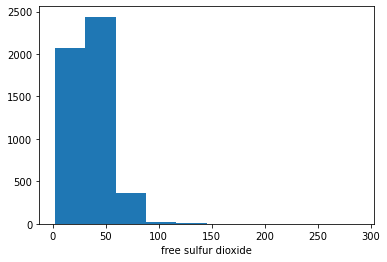

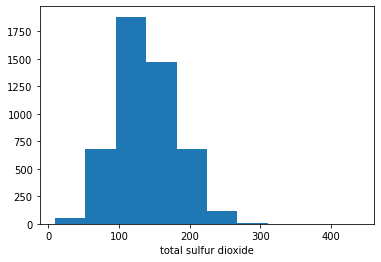

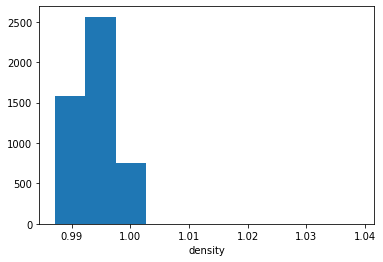

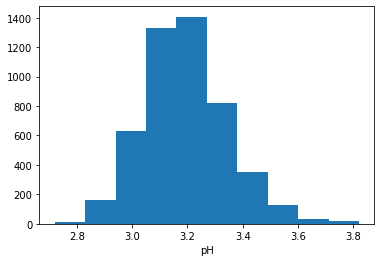

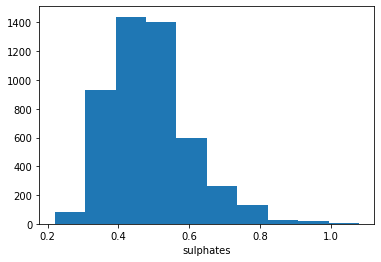

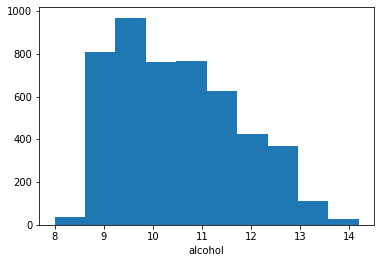

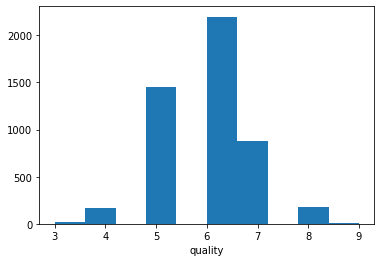

In [9]:
for col in train_df_final.columns.values :
  plt.hist(train_df_final[col])
  plt.xlabel(col)
  plt.show()

Observation:
All variables seem to spread well,
though residual sugar and chlorides has the less spread we will still hold them and go further.

In [10]:
train_df_final.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Observation:
75% of the wine has the quality 6 max quality is 8.
Mean of quality is 5.6360

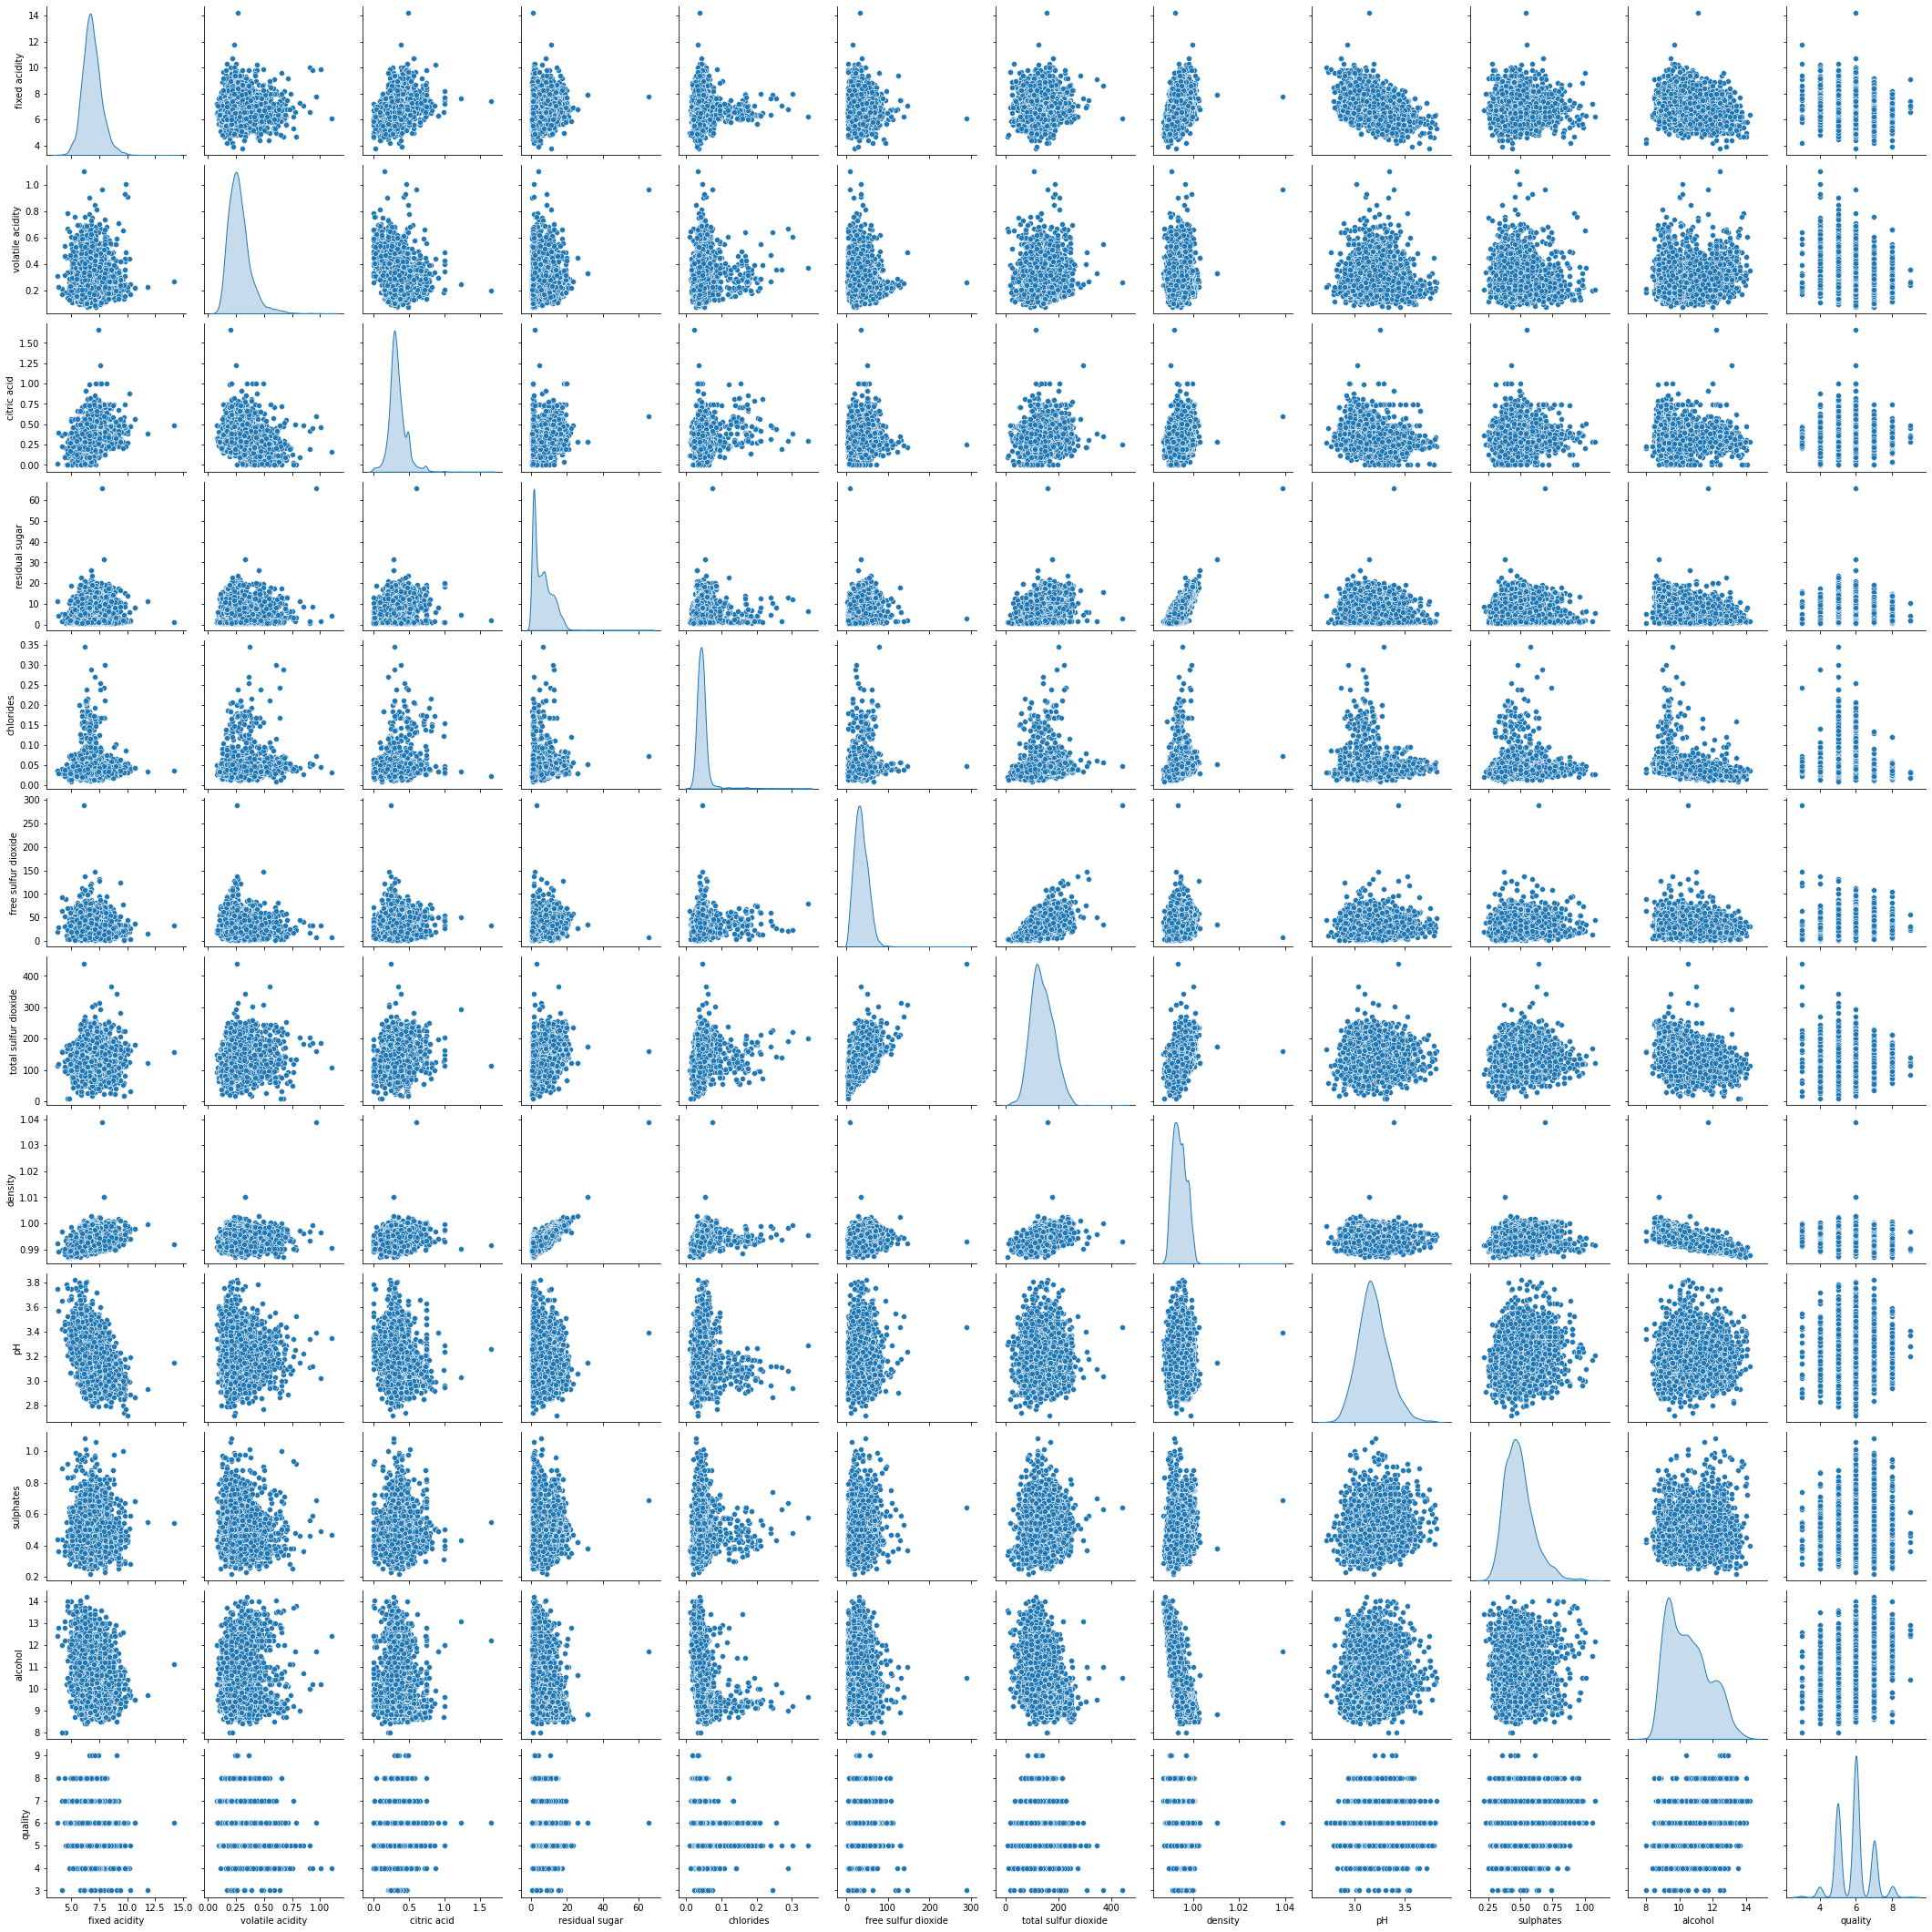

In [11]:
sns.pairplot(train_df_final, diag_kind='kde')

Observation:
Quantity has the quantized data

Next:
We will get the correlation between the variable.

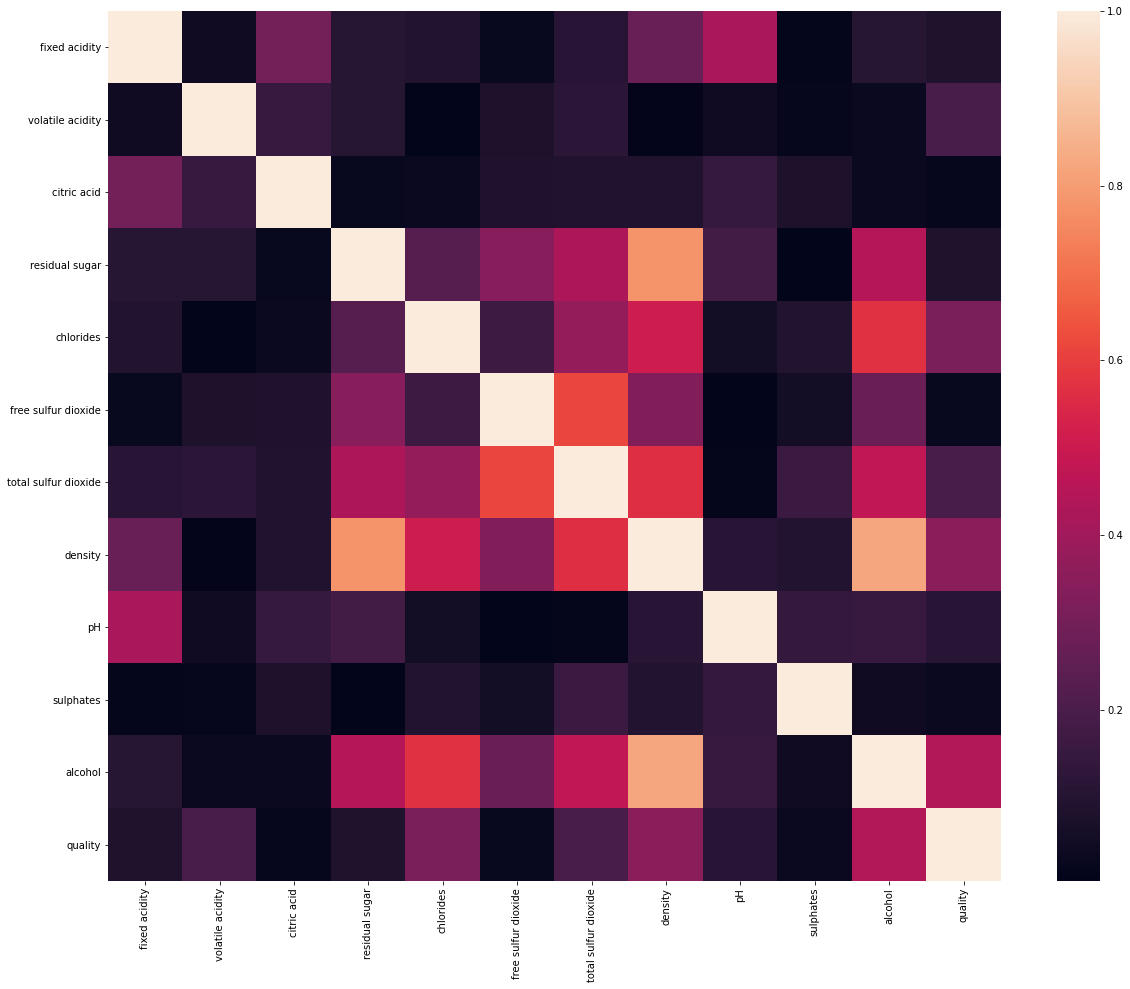

In [12]:
corrMatrix = train_df_final.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot= False)
plt.show()

Observation:
dont have the white boxes off-diagonal so we dont have to drop any feature due to correlation.

Noramlizing data

In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
cols_in_x = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
scaler.fit(train_df_final[cols_in_x])
train_x = pd.DataFrame(scaler.transform(train_df_final[cols_in_x]))
train_y = pd.DataFrame(train_df_final['quality'])
display(train_x)
print(train_x.mean())

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


0     7.584333e-17
1     5.196832e-16
2     6.019639e-16
3    -1.024542e-16
4     6.482723e-17
5    -4.671641e-17
6     1.057636e-16
7     3.212112e-14
8    -1.203860e-15
9    -7.572999e-16
10   -2.178784e-15
dtype: float64


Obeservation:
Mean looks zero and hopefully std. is 1

Next:
We should go for normalizing the test data.

In [14]:
test_x = pd.DataFrame(scaler.transform(test_df_final[cols_in_x]))
test_y = pd.DataFrame(test_df_final['quality'])
display(test_x)
print(test_x.mean())

,0,1,2,3,4,5,6,7,8,9,10
0,0.646153,4.184769,-2.761743,-0.885612,1.383686,-1.429433,-2.455907,1.261493,2.130894,0.614763,-0.905544
1,1.120209,5.970763,-2.761743,-0.747587,2.390748,-0.606165,-1.679322,0.927112,0.077712,1.666341,-0.580471
2,1.120209,4.780100,-2.431185,-0.806740,2.116094,-1.194214,-1.985250,0.993988,0.475102,1.403446,-0.580471
3,5.149685,0.017452,1.866071,-0.885612,1.337911,-1.076604,-1.844052,1.328369,-0.187215,0.790026,-0.580471
4,0.646153,4.184769,-2.761743,-0.885612,1.383686,-1.429433,-2.455907,1.261493,2.130894,0.614763,-0.905544
...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.776015,3.192551,-2.100627,-0.865894,2.024543,-0.194531,-2.220579,0.291789,1.733504,0.790026,-0.011595
1595,-1.131557,2.696442,-1.935348,-0.826458,0.742829,0.217102,-2.055848,0.365352,2.197125,2.367393,0.557282
1596,-0.657501,2.299554,-1.687429,-0.806740,1.383686,-0.370946,-2.314710,0.572669,1.534809,2.279762,0.394746
1597,-1.131557,3.639049,-1.770069,-0.865894,1.337911,-0.194531,-2.220579,0.482386,2.528284,1.929235,-0.255399


0     1.736052
1     2.476373
2    -0.522413
3    -0.759653
4     1.908573
5    -1.142764
6    -2.162504
7     0.909283
8     0.813633
9     1.474856
10   -0.074185
dtype: float64


Observation:

The means are no longer zero because we did not re-fit.

1) Part-c : Training validating and testing 


  ** At least three models we have to select mentioned in the problem **


Lasso regularized linear regression (with LassoCV)

---





In [15]:
from sklearn import linear_model
from sklearn.model_selection import RepeatedKFold   ##for cross validation
lassoCV = linear_model.LassoCV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) ## making the custom split for cross validation
reg_lasso = lassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1); ## This will automatically tune for the value of HyperParameter alpha
lasso_fit = reg_lasso.fit(train_x, train_y);


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1249.6771467803228, tolerance: 0.3479356624319406
  tol, rng, random, positive)
/usr/local/l

In [16]:
print('alpha: - ' , lasso_fit.alpha_)
print('R^2 score is : ')
lasso_fit.score(train_x,train_y)

alpha: -  0.0
R^2 score is : 


0.2818703641332855

R^2 score for Test data.

In [17]:
print('R^2 score is : ')
lasso_fit.score(test_x,test_y)

R^2 score is : 


-0.5709678917428578

Accuracy is negative.

Random forest model

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV ## cross validation for hyperparameter tuning
from sklearn.metrics import r2_score, make_scorer
scorer = make_scorer(r2_score, greater_is_better= True)

## Selecting one parameter n_estimatiors for hyperparameter tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
rfReg = RandomForestRegressor()
rf_search = RandomizedSearchCV(estimator = rfReg, param_distributions = {'n_estimators' : n_estimators} , n_iter = 100, cv = 5, random_state=50, scoring=scorer, n_jobs = -1)
#model fit
rf_search.fit(train_x, train_y)
 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

getting the best value of n_estimator:-

In [19]:
rf_search.best_params_

{'n_estimators': 366}

We got the value of n_estimators = 366 after hyperparameter tuning.

In [20]:

#predicting the test data
predict_y = rf_search.predict(test_x)
r2_score(test_y, predict_y)

-0.7893370064650778

Test accuracy is negative
---



Support vector Regression (using GridsearchCV) :-

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import svm #try svm
hyperparameters = {'kernel': ('rbf', 'linear', 'poly')} ## this time we are tuning the kernel hyperparameter.
svr = svm.SVR()
svr_model = GridSearchCV(estimator= svr, param_grid=hyperparameters, scoring= scorer)
svr_model.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ('rbf', 'linear', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(r2_score), verbose=0)

In [22]:
print('Best Parameters : ')
print(svr_model.best_params_)
print('Best Score : ')
print(svr_model.best_score_)


Best Parameters : 
{'kernel': 'rbf'}
Best Score : 
0.30676601398148173


RBF is best kernel here.

Testing score:-

---



In [23]:
predictsvr_y = svr_model.predict(test_x)
r2_score(test_y, predictsvr_y)

-0.4210022571857339

Since the test accuracy is coming in negative means we cant use the same model for both the datasets interchangebly.